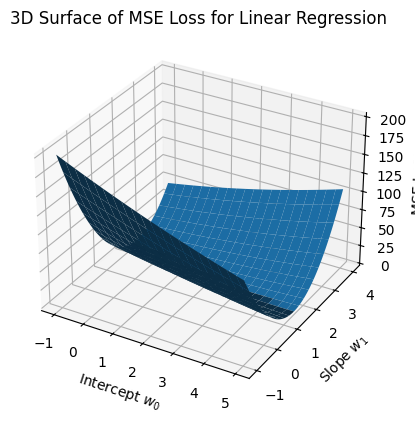

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data for linear regression: y = 2*x + 1 + noise
np.random.seed(0)
x = np.linspace(0, 10, 20)
y = 2 * x + 1 + np.random.randn(*x.shape) * 2

# Define ranges for parameters w0 (intercept) and w1 (slope)
w0_range = np.linspace(-1, 5, 100)
w1_range = np.linspace(-1, 4, 100)

# Compute MSE loss for each combination of (w0, w1)
W0, W1 = np.meshgrid(w0_range, w1_range)
loss = np.zeros_like(W0)

n = x.shape[0]
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        y_pred = W1[i, j] * x + W0[i, j]
        loss[i, j] = (1/(2*n)) * np.sum((y - y_pred) ** 2)

# Create 3D plot of the loss surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, loss, rstride=5, cstride=5)

ax.set_xlabel('Intercept $w_0$')
ax.set_ylabel('Slope $w_1$')
ax.set_zlabel('MSE Loss')
ax.set_title('3D Surface of MSE Loss for Linear Regression')

plt.show()


In [16]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

# Use the browser renderer instead of notebook mime
pio.renderers.default = 'browser'

# Generate sample data
np.random.seed(0)
x = np.linspace(0, 10, 20)
y = 2 * x   + 1 + np.random.randn(*x.shape) * 2

# Define parameter ranges
w0_range = np.linspace(-1, 5, 100)
w1_range = np.linspace(-1, 4, 100)
W0, W1 = np.meshgrid(w0_range, w1_range)

# Compute MSE loss
n = x.shape[0]
loss = (1/(2*n)) * np.sum((y.reshape(1,1,-1) - (W1[:,:,None] * x + W0[:,:,None]))**2, axis=2)

# Create interactive 3D surface
fig = go.Figure(data=[go.Surface(x=W0, y=W1, z=loss)])
fig.update_layout(
    title='Interactive MSE Loss Surface',
    scene=dict(
        xaxis_title='Intercept w0',
        yaxis_title='Slope w1',
        zaxis_title='MSE Loss'
    ),
    autosize=True,
    width=700,
    height=700
)

# Instead of fig.show(), write to an HTML file and open in browser
html_path = 'mse_surface.html'
fig.write_html(html_path, auto_open=True)
print(f"Interactive plot saved to {html_path} and opened in your default browser.")


Interactive plot saved to mse_surface.html and opened in your default browser.


Converged to w0 = 0.5100, w1 = 2.5769


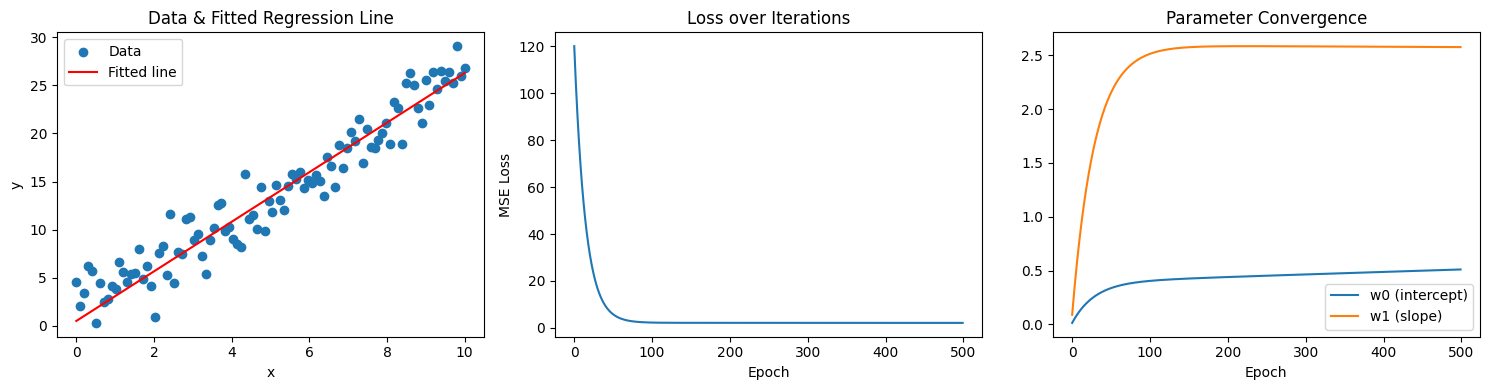

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression: y = 2.5*x + 1.0 + noise
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2.5 * x + 1.0 + np.random.randn(x.shape[0]) * 2

# Gradient descent settings
w0, w1 = 0.0, 0.0           # initial intercept and slope
learning_rate = 0.001
epochs = 500

n = x.shape[0]
w0_history, w1_history, loss_history = [], [], []

# Gradient descent loop
for epoch in range(epochs):
    y_pred = w1 * x + w0
    error = y - y_pred
    # Compute MSE loss with 1/(2n) factor
    loss = (1/(2*n)) * np.sum(error**2)
    # Compute gradients
    grad_w0 = -(1/n) * np.sum(error)
    grad_w1 = -(1/n) * np.sum(error * x)
    # Update parameters
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1
    
    # Store history
    w0_history.append(w0)
    w1_history.append(w1)
    loss_history.append(loss)

# Print final parameters
print(f"Converged to w0 = {w0:.4f}, w1 = {w1:.4f}")

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1) Data and fitted line
axes[0].scatter(x, y, label='Data')
axes[0].plot(x, w1 * x + w0, color='red', label='Fitted line')
axes[0].set_title('Data & Fitted Regression Line')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

# 2) Loss over iterations
axes[1].plot(loss_history)
axes[1].set_title('Loss over Iterations')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MSE Loss')

# 3) Parameter trajectories
axes[2].plot(w0_history, label='w0 (intercept)')
axes[2].plot(w1_history, label='w1 (slope)')
axes[2].set_title('Parameter Convergence')
axes[2].set_xlabel('Epoch')
axes[2].legend()

plt.tight_layout()
plt.show()


In [19]:
import numpy as np

In [20]:
np.random.seed(0)

In [24]:
x = np.linspace(0, 10, 100, endpoint=False)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])